In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn import svm  
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.metrics import auc, precision_recall_curve,classification_report
import seaborn as sns

In [50]:

d = pd.read_csv('C:/Users/Ankush Negi/Desktop/Video Anomaly Detection in Road Accidents/CSV/Canny.csv',index_col=0)
display(d.head())


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.000690,0.000201,0.000115,0.001236,0.000172,0.000058,0.000460,0.000374,0.000172,0.000891,...,0.000201,0.000058,0.000115,0.001236,0.000747,0.000201,0.000201,0.000288,0.000690,0
1,0.004736,0.006684,0.005395,0.005252,0.007513,0.005539,0.003991,0.003819,0.004106,0.003762,...,0.004421,0.004134,0.003188,0.005252,0.004364,0.002614,0.003618,0.003762,0.003274,0
2,0.015926,0.015784,0.021629,0.020553,0.024316,0.023695,0.022422,0.022337,0.018142,0.018483,...,0.014418,0.010285,0.008857,0.010827,0.019986,0.014020,0.008629,0.011712,0.023044,0
3,0.006569,0.005739,0.020836,0.020978,0.008171,0.003045,0.002844,0.016153,0.017688,0.002786,...,0.001753,0.000316,0.000144,0.018256,0.018227,0.014020,0.001667,0.001293,0.000891,0
4,0.007800,0.009600,0.007084,0.005882,0.004994,0.003418,0.002528,0.003331,0.005223,0.004622,...,0.004937,0.004134,0.004163,0.005023,0.007342,0.006455,0.006140,0.003905,0.003762,0


In [51]:
data = d

X_train, X_test = train_test_split(data, test_size=0.2, random_state=0)
Y_train,Y_test=X_train['Class'].values,X_test['Class'].values


X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)

std = StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


In [52]:
from sklearn.svm import SVC
from sklearn import metrics
for i in range(1,10):
    svc = SVC(kernel='rbf',C=i,degree=1,probability = True).fit(X_train,Y_train)
    
    test_prob = svc.decision_function(X_test) 
    test_pred = svc.predict(X_test)    
    
    train_prob = svc.decision_function(X_train) 
    train_pred = svc.predict(X_train)    
    
    fpr_test,tpr_test,_ = metrics.roc_curve(Y_test,test_prob)     
    auc_test = metrics.auc(fpr_test,tpr_test)                              
    score_test = metrics.accuracy_score(Y_test,test_pred)
    
    fpr_train,tpr_train,_ = metrics.roc_curve(Y_train,train_prob)     
    auc_train = metrics.auc(fpr_train,tpr_train)                              
    score_train = metrics.accuracy_score(Y_train,train_pred)
    
    print('Test: %.4f' %score_test,'%.4f' %auc_test,'|',"Train: %.4f" %score_train,'%.4f' %auc_train)

Test: 0.7167 0.7338 | Train: 0.7741 0.8626
Test: 0.7333 0.7387 | Train: 0.7992 0.9031
Test: 0.7333 0.7424 | Train: 0.8201 0.9193
Test: 0.7333 0.7265 | Train: 0.8326 0.9292
Test: 0.7333 0.7118 | Train: 0.8410 0.9332
Test: 0.7167 0.7094 | Train: 0.8368 0.9351
Test: 0.7167 0.7021 | Train: 0.8494 0.9425
Test: 0.7167 0.7009 | Train: 0.8577 0.9440
Test: 0.7167 0.6899 | Train: 0.8619 0.9413


In [53]:
list_score = np.empty(30)
for i in range(30):
    X_train, X_test = train_test_split(data, test_size=0.2, random_state=i)
    Y_train,Y_test=X_train['Class'].values,X_test['Class'].values
    X_train = X_train.drop(['Class'], axis=1).values
    X_test = X_test.drop(['Class'], axis=1).values

    std =MinMaxScaler()
    X_train=std.fit_transform(X_train)
    X_test=std.transform(X_test)
    best_score=[]
    for j in range(1,10):
        svc = SVC(kernel='rbf',C=j,degree=1,probability = True).fit(X_train,Y_train)

        test_prob = svc.decision_function(X_test) 
        test_pred = svc.predict(X_test)    

        train_prob = svc.decision_function(X_train) 
        train_pred = svc.predict(X_train)    

        fpr_test,tpr_test,_ = metrics.roc_curve(Y_test,test_prob)     
        auc_test = metrics.auc(fpr_test,tpr_test)                              
        score_test = metrics.accuracy_score(Y_test,test_pred)

        fpr_train,tpr_train,_ = metrics.roc_curve(Y_train,train_prob)     
        auc_train = metrics.auc(fpr_train,tpr_train)                              
        score_train = metrics.accuracy_score(Y_train,train_pred)
        best_score.append(score_test)

    score=max(best_score)
    # list_score.append(score)
    list_score = np.append(list_score, score)
    print('Test: %.4f' %score)

print("Average Test Accuracy: ",np.mean(np.array(list_score)))


Test: 0.7333
Test: 0.7000
Test: 0.6833
Test: 0.7333
Test: 0.7667
Test: 0.6667
Test: 0.8333
Test: 0.6833
Test: 0.8000
Test: 0.7000
Test: 0.7833
Test: 0.7500
Test: 0.7500
Test: 0.7333
Test: 0.7500
Test: 0.7667
Test: 0.6167
Test: 0.7500
Test: 0.8000
Test: 0.7000
Test: 0.7167
Test: 0.7000
Test: 0.7500
Test: 0.7833
Test: 0.7667
Test: 0.7000
Test: 0.7833
Test: 0.7667
Test: 0.7333
Test: 0.7833
Average Test Accuracy:  0.6467063492063492


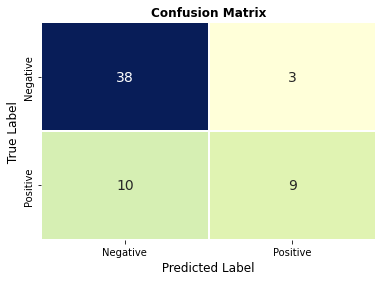


			 Classification Report: 

               precision    recall  f1-score   support

           0       0.79      0.93      0.85        41
           1       0.75      0.47      0.58        19

    accuracy                           0.78        60
   macro avg       0.77      0.70      0.72        60
weighted avg       0.78      0.78      0.77        60



Test Accuracy:  0.7833333333333333


In [54]:
# Create the confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, test_pred)

# Create the heatmap
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"fontsize":14}, cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], linewidths=0.1)

# Add labels and title to the plot
plt.title("Confusion Matrix", fontweight="bold")
plt.xlabel(" Predicted Label ", fontsize=12)
plt.ylabel(" True Label ", fontsize=12)

# Show the plot
plt.show()


print("\n\t\t\t Classification Report: \n\n", classification_report(Y_test, test_pred))
print("\n")
print("Test Accuracy: ", score)